## Install `miniconda`

We firstly start by downloading the binary files to install miniconda, it is available for windows, Mac, and Linux. Check documentation for each installation process and requirements.

## Create a `conda` enviroment

To open a `conda` you need to open `Anaconda PowerShell` on Windows or just use the terminal with Linux/Mac.

To create an enviroment:

`conda create -n <enviroment name here>`

After that, you can activte the enviroment using

`conda activate <enviroment name here>`

Once you are on the enviroment, you can install python using this command:

`conda install python`

Now you can use `pip` inside of the `conda` enviroment to install `pandas` and `jupyter-lab` using the command:

`pip install pandas jupyterlab`

## Move to a working directory

Type on the terminal `pwd` to check where are you located within your filesystem.

Type `ls` to list the files and directories you have access to.

Type `cd <name of the directory>` and now you can type `pwd` again to check you have moved there.

To create a new directory you need to type `mkdir <name of the new direcotry>` and you can check with `ls` to find the new directory.

## How to uncompress a zip file doc

In [141]:
import zipfile

with zipfile.ZipFile('iter_31_2010_csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# How to open a pandas dataframe

In [142]:
import pandas as pd

In [143]:
data = pd.read_csv('iter_31_cpv2010/conjunto_de_datos/iter_31_cpv2010.csv')

Revisamos su tamaño

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Columns: 200 entries, entidad to tam_loc
dtypes: float64(4), int64(6), object(190)
memory usage: 4.2+ MB


Filtramos para quitar totales a nivel estado y municipio

In [145]:
data = data[(data['mun'] != 0) & (data['loc'] != 0)]

Elegimos columnas de interes

In [146]:
data = data[['entidad', 'mun', 'nom_mun', 'pobtot', 'tvivparhab', 'vivtot', 'vph_snbien']]
data

,entidad,mun,nom_mun,pobtot,tvivparhab,vivtot,vph_snbien
4,31,1,Abalá,1890,525,628,10
5,31,1,Abalá,494,127,140,19
6,31,1,Abalá,334,89,94,4
7,31,1,Abalá,760,185,203,5
8,31,1,Abalá,2323,542,589,25
...,...,...,...,...,...,...,...
2769,31,106,Yobaín,6,*,1,*
2770,31,106,Yobaín,3,*,1,*
2771,31,106,Yobaín,4,*,2,*
2772,31,106,Yobaín,7,*,1,*


Revisamos los tipos de datos, vemos que las ultimas se pusieorn como objects instead of int

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 4 to 2773
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   entidad     2665 non-null   int64 
 1   mun         2665 non-null   int64 
 2   nom_mun     2665 non-null   object
 3   pobtot      2665 non-null   int64 
 4   tvivparhab  2665 non-null   object
 5   vivtot      2665 non-null   int64 
 6   vph_snbien  2665 non-null   object
dtypes: int64(4), object(3)
memory usage: 166.6+ KB


Aqui convertimos las columnas a int

In [148]:
data['tvivparhab'] = data['tvivparhab'].replace('*', '0')
data['tvivparhab'] = data['tvivparhab'].astype(int)
data['vivtot'] = data['vivtot'].replace('*', '0')
data['vivtot'] = data['vivtot'].astype(int)
data['tvivparhab'] = data['tvivparhab'].replace('*', '0')
data['tvivparhab'] = data['tvivparhab'].astype(int)
data['vph_snbien'] = data['vph_snbien'].replace('*', '0')
data['vph_snbien'] = data['vph_snbien'].astype(int)

Comprobamos

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2665 entries, 4 to 2773
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   entidad     2665 non-null   int64 
 1   mun         2665 non-null   int64 
 2   nom_mun     2665 non-null   object
 3   pobtot      2665 non-null   int64 
 4   tvivparhab  2665 non-null   int64 
 5   vivtot      2665 non-null   int64 
 6   vph_snbien  2665 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 166.6+ KB


In [150]:
data

,entidad,mun,nom_mun,pobtot,tvivparhab,vivtot,vph_snbien
4,31,1,Abalá,1890,525,628,10
5,31,1,Abalá,494,127,140,19
6,31,1,Abalá,334,89,94,4
7,31,1,Abalá,760,185,203,5
8,31,1,Abalá,2323,542,589,25
...,...,...,...,...,...,...,...
2769,31,106,Yobaín,6,0,1,0
2770,31,106,Yobaín,3,0,1,0
2771,31,106,Yobaín,4,0,2,0
2772,31,106,Yobaín,7,0,1,0


Hacemos un group by por municipio

In [151]:
clean_data = data.groupby(['entidad', 'mun', 'nom_mun']).sum().reset_index()
clean_data

,entidad,mun,nom_mun,pobtot,tvivparhab,vivtot,vph_snbien
0,31,1,Abalá,6364,1608,1833,67
1,31,2,Acanceh,15365,3695,4169,136
2,31,3,Akil,10406,2535,2918,212
3,31,4,Baca,5773,1558,1935,40
4,31,5,Bokobá,2054,579,763,18
...,...,...,...,...,...,...,...
101,31,102,Valladolid,74799,17477,23311,1359
102,31,103,Xocchel,3243,774,947,54
103,31,104,Yaxcabá,14895,3436,4023,658
104,31,105,Yaxkukul,2895,764,897,17


Sacamos densidades de las variables que teniamos, ploteamos, y analizamos

In [152]:
densidad_vivienda = clean_data['pobtot'] / clean_data['tvivparhab']

In [153]:
densidad_vivienda

0      3.957711
1      4.158322
2      4.104931
3      3.705392
4      3.547496
         ...   
101    4.279854
102    4.189922
103    4.334983
104    3.789267
105    3.442675
Length: 106, dtype: float64

In [154]:
clean_data['densidad_vivienda'] = densidad_vivienda
clean_data

,entidad,mun,nom_mun,pobtot,tvivparhab,vivtot,vph_snbien,densidad_vivienda
0,31,1,Abalá,6364,1608,1833,67,3.957711
1,31,2,Acanceh,15365,3695,4169,136,4.158322
2,31,3,Akil,10406,2535,2918,212,4.104931
3,31,4,Baca,5773,1558,1935,40,3.705392
4,31,5,Bokobá,2054,579,763,18,3.547496
...,...,...,...,...,...,...,...,...
101,31,102,Valladolid,74799,17477,23311,1359,4.279854
102,31,103,Xocchel,3243,774,947,54,4.189922
103,31,104,Yaxcabá,14895,3436,4023,658,4.334983
104,31,105,Yaxkukul,2895,764,897,17,3.789267


<Axes: >

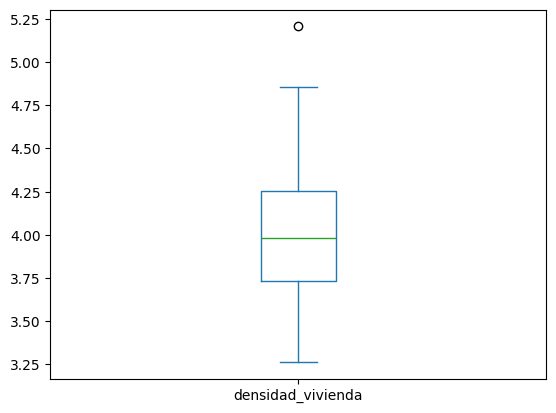

In [155]:
clean_data.sort_values('densidad_vivienda')['densidad_vivienda'].plot(kind='box')

In [156]:
densidad_cantidad_de_casitas = clean_data['tvivparhab'] / clean_data['vivtot']
clean_data['ratio_casas_ocupadas'] = densidad_cantidad_de_casitas

In [157]:
clean_data

,entidad,mun,nom_mun,pobtot,tvivparhab,vivtot,vph_snbien,densidad_vivienda,ratio_casas_ocupadas
0,31,1,Abalá,6364,1608,1833,67,3.957711,0.877250
1,31,2,Acanceh,15365,3695,4169,136,4.158322,0.886304
2,31,3,Akil,10406,2535,2918,212,4.104931,0.868746
3,31,4,Baca,5773,1558,1935,40,3.705392,0.805168
4,31,5,Bokobá,2054,579,763,18,3.547496,0.758847
...,...,...,...,...,...,...,...,...,...
101,31,102,Valladolid,74799,17477,23311,1359,4.279854,0.749732
102,31,103,Xocchel,3243,774,947,54,4.189922,0.817318
103,31,104,Yaxcabá,14895,3436,4023,658,4.334983,0.854089
104,31,105,Yaxkukul,2895,764,897,17,3.789267,0.851728


<Axes: >

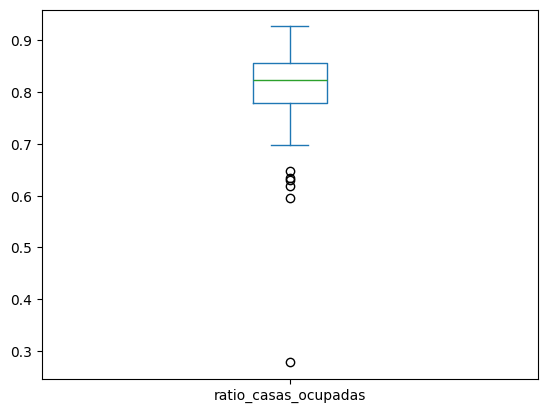

In [158]:
clean_data.sort_values('densidad_vivienda')['ratio_casas_ocupadas'].plot(kind='box')

Esta metrica para la siguiente

In [159]:
viviendas_sinbien = clean_data['vph_snbien'] / clean_data['vivtot']
clean_data['viviendas_sinbien'] = viviendas_sinbien
clean_data

,entidad,mun,nom_mun,pobtot,tvivparhab,vivtot,vph_snbien,densidad_vivienda,ratio_casas_ocupadas,viviendas_sinbien
0,31,1,Abalá,6364,1608,1833,67,3.957711,0.877250,0.036552
1,31,2,Acanceh,15365,3695,4169,136,4.158322,0.886304,0.032622
2,31,3,Akil,10406,2535,2918,212,4.104931,0.868746,0.072653
3,31,4,Baca,5773,1558,1935,40,3.705392,0.805168,0.020672
4,31,5,Bokobá,2054,579,763,18,3.547496,0.758847,0.023591
...,...,...,...,...,...,...,...,...,...,...
101,31,102,Valladolid,74799,17477,23311,1359,4.279854,0.749732,0.058299
102,31,103,Xocchel,3243,774,947,54,4.189922,0.817318,0.057022
103,31,104,Yaxcabá,14895,3436,4023,658,4.334983,0.854089,0.163560
104,31,105,Yaxkukul,2895,764,897,17,3.789267,0.851728,0.018952


<Axes: >

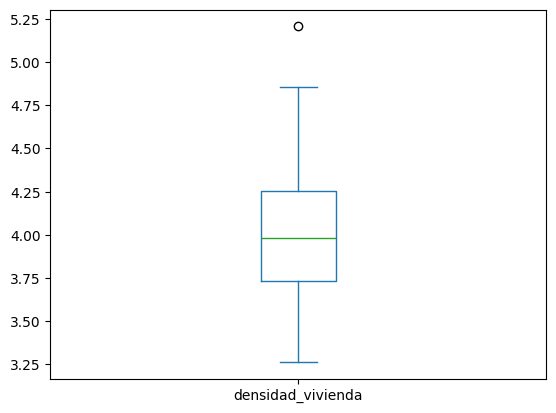

In [160]:
clean_data.sort_values('densidad_vivienda')['densidad_vivienda'].plot(kind='box')